In [1]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline

In [2]:
attractionP = pd.read_csv(r"Z:\data\VIATR_FCLTY_INFO.csv", delimiter='|') #18테이블 csv파일 가져오기
attractionP[['XCNTS_VALUE_attractionP','YDNTS_VALUE_attractionP']]=attractionP[['XCNTS_VALUE','YDNTS_VALUE']] #x좌표값, y좌표값 칼럼 이름 덮어서 변경
attractionPP=attractionP[['XCNTS_VALUE_attractionP','YDNTS_VALUE_attractionP']] #x,y 좌표 칼럼만 뽑아서 데이터프레임으로 지정


In [3]:
attractionPP

,XCNTS_VALUE_attractionP,YDNTS_VALUE_attractionP
0,205885,445740
1,206802,443775
2,202414,459742
3,204162,445980
4,202247,459993
...,...,...
19064,204710,444081
19065,204661,444062
19066,204610,444040
19067,204596,444074


In [4]:
attractionPP.drop(attractionPP.index[5000:],axis='rows',inplace=True)

C:\Users\bigdata12\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
attractionPL=len(attractionPP) #데이터프레임 열의 길이

attractionPP

,XCNTS_VALUE_attractionP,YDNTS_VALUE_attractionP
0,205885,445740
1,206802,443775
2,202414,459742
3,204162,445980
4,202247,459993
...,...,...
4995,203531,444810
4996,203723,444685
4997,202592,444195
4998,203407,444795


In [6]:
block = pd.read_csv(r"Z:\data\BLCK_DIM.csv", delimiter='|') #23테이블 csv파일 가져오기
block[['ADSTRD_CD','XCNTS_VALUE_block','YDNTS_VALUE_block']]=block[['ADSTRD_CD','XCNTS_VALUE','YDNTS_VALUE']]#x좌표값, y좌표값 칼럼 이름 덮어서 변경
block_P=block[['ADSTRD_CD','XCNTS_VALUE_block','YDNTS_VALUE_block']] #행정동,x,y 좌표 칼럼만 뽑아서 데이터프레임으로 지정


In [7]:
block_P.drop(block_P.index[2000:],axis='rows',inplace=True)

C:\Users\bigdata12\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
block_L=len(block_P) #데이터프레임 열의 길이

block_P

,ADSTRD_CD,XCNTS_VALUE_block,YDNTS_VALUE_block
0,11680660,205139,442688
1,11305555,201925,457763
2,11305555,202139,457628
3,11680565,204256,446790
4,11680630,204471,444947
...,...,...,...
1995,11305575,201712,457528
1996,11305555,201972,456952
1997,11305610,201790,459001
1998,11305600,203004,459276


In [9]:
block_L

2000

In [10]:
attractionPL

5000

In [11]:
number_aP

NameError: name 'number_aP' is not defined

In [12]:
#  다음의 반복문은 23테이블 한 열의 x,y좌표로 만든 식을 기준으로 18테이블 집객시설들의 x,y 좌표들를 넣어보면서 일정 거리
#  내에 있는 집객시설의 수를 리스트에 추가, 이 과정을 23테이블 한열씩 함으로써 수집한 테이터를 2차원 리스트로 전환,
#  값들을 데이터프레임으로 변형하여 attractionPP 데이터 브레임에 추가해 블럭마다 일정거리에 있는 집객시설 수를 알 수 있음
number_aP_list=[]
for k in range(block_L):
    print(k)
    attractionPP_list=[]
    block_P_x=block_P.iloc[k,1] #각 블록의 x좌표 값들을 반복문을 통해 순서대로 가져옴
    block_P_y=block_P.iloc[k,2] #각 블록의 y좌표 값들을 반복문을 통해 순서대로 가져옴
    for i in range(attractionPL):
        attractionPP_x=attractionPP.iloc[i,0]#각 집객시설의 x좌표 값들을 반복문을 통해 순서대로 가져옴
        attractionPP_y=attractionPP.iloc[i,1]#각 sdjEdddd집객시설의 y좌표 값들을 반복문을 통해 순서대로 가져옴
        number_aP=abs(((block_P_x-attractionPP_x)**2+(block_P_y-attractionPP_y)**2)) #블록 근처에 있는 집객시설 수 계산식
        if number_aP<=300000:
            attractionPP_list.append(number_aP) #거리안에 있는 집객시설 데이터 리스트에 추가
    number_aP_dt=len(attractionPP_list) #리스트의 길이를 셈으로 집객시설수 계산, 리스트에 추가
    number_aP_list.append(number_aP_dt) #위의 리스트를 또 다른 리스트에 추가
block_P['attractionPP_num']=number_aP_list #집객시설 수 가 담긴 리스트를 블록들의 좌표가 있는 데이터프레임에 추가

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999


C:\Users\bigdata12\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
block_P

,ADSTRD_CD,XCNTS_VALUE_block,YDNTS_VALUE_block,attractionPP_num
0,11680660,205139,442688,45
1,11305555,201925,457763,115
2,11305555,202139,457628,123
3,11680565,204256,446790,183
4,11680630,204471,444947,221
...,...,...,...,...
1995,11305575,201712,457528,124
1996,11305555,201972,456952,24
1997,11305610,201790,459001,162
1998,11305600,203004,459276,36


In [14]:
rent_value = pd.read_csv(r"Z:\data\RENT_CURPRC.csv", delimiter='|') #9테이블 csv파일 가져오기
rent_value

,STDR_YY_CD,STDR_QU_CD,ADSTRD_CD,RENT_FLOOR_CD,GTN_AVRG,MT_RNTCHRG_AVRG,CNVRSN_RNTCHRG,RENT_CO
0,2017,1,11305610,0,1374212,56857,70599,62
1,2017,1,11680610,0,1250058,94182,106682,83
2,2017,1,11680590,0,1783728,115689,133526,82
3,2017,1,11305645,0,1091208,61458,72370,38
4,2017,1,11680740,0,0,0,0,10
...,...,...,...,...,...,...,...,...
1253,2019,4,11680610,2,916115,145287,154448,98
1254,2019,4,11680545,2,1359010,73793,87383,136
1255,2019,4,11680510,1,2061959,151911,172531,99
1256,2019,4,11680700,2,3057282,68715,99288,41


In [15]:
rent_valueP=rent_value[['ADSTRD_CD','RENT_FLOOR_CD','CNVRSN_RNTCHRG']] #행정동, 층, 임대시세 칼럼만 뽑아서 데이터프레임으로 지정
rent_valueP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ADSTRD_CD       1258 non-null   int64
 1   RENT_FLOOR_CD   1258 non-null   int64
 2   CNVRSN_RNTCHRG  1258 non-null   int64
dtypes: int64(3)
memory usage: 29.6 KB


In [16]:
rent_valueP=rent_valueP[(rent_valueP['RENT_FLOOR_CD']<=4)] #층이 4층 이하인 정보들만 추출(4층 이후부터는 층별효용비가 비슷)
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
0,11305610,0,70599
1,11680610,0,106682
2,11680590,0,133526
3,11305645,0,72370
4,11680740,0,0
...,...,...,...
1253,11680610,2,154448
1254,11680545,2,87383
1255,11680510,1,172531
1256,11680700,2,99288


In [17]:
rent_valueP = rent_valueP.sort_values(by=['ADSTRD_CD','RENT_FLOOR_CD','CNVRSN_RNTCHRG'] ,ascending=True) #행정동과 층을 중심으로 데이터를 내림차순으로 정리
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
643,11305534,0,66884
748,11305534,0,68679
14,11305534,0,75960
538,11305534,0,76111
957,11305534,0,77003
...,...,...,...
687,11680750,2,117445
582,11680750,2,129845
161,11680750,2,133185
269,11680750,2,139010


In [18]:
rent_valueP.columns

Index(['ADSTRD_CD', 'RENT_FLOOR_CD', 'CNVRSN_RNTCHRG'], dtype='object')

In [19]:
#rent_valueP=rent_valueP[rent_valueP.duplicated(['ADSTRD_CD'],keep='last')]
#rent_valueP
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
643,11305534,0,66884
748,11305534,0,68679
14,11305534,0,75960
538,11305534,0,76111
957,11305534,0,77003
...,...,...,...
687,11680750,2,117445
582,11680750,2,129845
161,11680750,2,133185
269,11680750,2,139010


In [20]:
rent_valueP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 643 to 58
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ADSTRD_CD       1258 non-null   int64
 1   RENT_FLOOR_CD   1258 non-null   int64
 2   CNVRSN_RNTCHRG  1258 non-null   int64
dtypes: int64(3)
memory usage: 39.3 KB


In [21]:
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
643,11305534,0,66884
748,11305534,0,68679
14,11305534,0,75960
538,11305534,0,76111
957,11305534,0,77003
...,...,...,...
687,11680750,2,117445
582,11680750,2,129845
161,11680750,2,133185
269,11680750,2,139010


In [22]:
rent_valueP=rent_valueP.drop_duplicates(['ADSTRD_CD','RENT_FLOOR_CD'],keep='first')

In [23]:
#rent_valueP.groupby(['ADSTRD_CD','RENT_FLOOR_CD']).agg(['mean'])

In [24]:
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
643,11305534,0,66884
710,11305534,1,67066
169,11305534,2,39073
7,11305535,0,75531
70,11305535,1,89508
...,...,...,...
68,11680740,1,0
308,11680740,2,67466
32,11680750,0,0
79,11680750,1,0


In [25]:
rent_valueP_size=rent_valueP.groupby('ADSTRD_CD').size() #행정동 코드가 같은 열들의 사이즈를 구함(4층 이하의 데이터가 있을 수 있기에 사이즈로 정보를 얻어 계산할 예정)
rent_valueP_size_dt=pd.concat([rent_valueP_size], axis=1) #시리즈로 되어있는 행정동별 사이즈 데이터를 데이터프레임으로 전환
rent_valueP_size_list=list(np.array(rent_valueP_size_dt[0].tolist())) #데이터 프레임->리스트

#행정동별 사이즈 데이터를 9테이블 데이터를 전처리한 데이터 프레임과 합침
rent_value_plus=pd.merge(left=rent_valueP,
             right=rent_valueP_size_dt,
             how='left',
             left_on='ADSTRD_CD',
             right_on='ADSTRD_CD')


In [26]:
#rent_value_plus.drop(rent_value_plus.index[70:],axis='rows',inplace=True)

In [27]:
rent_value_plus.columns

Index(['ADSTRD_CD', 'RENT_FLOOR_CD', 'CNVRSN_RNTCHRG', 0], dtype='object')

In [28]:
rent_valueP

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG
643,11305534,0,66884
710,11305534,1,67066
169,11305534,2,39073
7,11305535,0,75531
70,11305535,1,89508
...,...,...,...
68,11680740,1,0
308,11680740,2,67466
32,11680750,0,0
79,11680750,1,0


In [29]:
len(rent_valueP_size)

35

In [30]:
len(rent_valueP_size_dt)

35

In [31]:
len(rent_valueP_size_list)

35

In [32]:
rent_value_plus

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0
0,11305534,0,66884,3
1,11305534,1,67066,3
2,11305534,2,39073,3
3,11305535,0,75531,3
4,11305535,1,89508,3
...,...,...,...,...
100,11680740,1,0,3
101,11680740,2,67466,3
102,11680750,0,0,3
103,11680750,1,0,3


In [33]:
rent_value_plus.drop(rent_value_plus.index[len(rent_valueP_size_list)*2:],axis='rows',inplace=False)
#rent_valueP_size_list의 2배로 rent_value_plus 의 행길이를 맞춤

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0
0,11305534,0,66884,3
1,11305534,1,67066,3
2,11305534,2,39073,3
3,11305535,0,75531,3
4,11305535,1,89508,3
...,...,...,...,...
65,11680610,2,96590,3
66,11680630,0,130896,3
67,11680630,1,160510,3
68,11680630,2,91253,3


In [34]:
rent_value_plus

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0
0,11305534,0,66884,3
1,11305534,1,67066,3
2,11305534,2,39073,3
3,11305535,0,75531,3
4,11305535,1,89508,3
...,...,...,...,...
100,11680740,1,0,3
101,11680740,2,67466,3
102,11680750,0,0,3
103,11680750,1,0,3


In [35]:
rent_valueP_size_list, len(rent_valueP_size)

([3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3],
 35)

In [36]:
rent_valueP_size_list

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [37]:
rent_value_plus

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0
0,11305534,0,66884,3
1,11305534,1,67066,3
2,11305534,2,39073,3
3,11305535,0,75531,3
4,11305535,1,89508,3
...,...,...,...,...
100,11680740,1,0,3
101,11680740,2,67466,3
102,11680750,0,0,3
103,11680750,1,0,3


In [38]:
floor_ratio=[]
pop=0
for i in rent_valueP_size_list:
    pop=pop+i
    floor_ratio.append(1) #1층의 효용비는 항상 1이기에 1을 리스트에 추가하고 시작
    if i==4: #1,2,3,4 층의 데이터가 있을 때
        
        _2f_ratio_cal=rent_value_plus.iloc[pop-3,2]/rent_value_plus.iloc[pop-4,2] #2층 효용비 계산
        _3f_ratio_cal=rent_value_plus.iloc[pop-2,2]/rent_value_plus.iloc[pop-4,2] #3층 효용비 계산
        _4f_ratio_cal=rent_value_plus.iloc[pop-1,2]/rent_value_plus.iloc[pop-4,2] #4층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
        floor_ratio.append(_3f_rastio_cal)
        floor_ratio.append(_4f_ratio_cal)
    elif i==3: #1,2,3 층의 데이터가 있을 때
        
        _2f_ratio_cal=rent_value_plus.iloc[pop-2,2]/rent_value_plus.iloc[pop-3,2] #2층 효용비 계산
        _3f_ratio_cal=rent_value_plus.iloc[pop-1,2]/rent_value_plus.iloc[pop-3,2] #3층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
        floor_ratio.append(_3f_ratio_cal)
    elif i==2: #1,2 층의 데이터가 있을 때
        
        _2f_ratio_cal=rent_value_plus.iloc[pop-1,2]/rent_value_plus.iloc[pop-2,2] #2층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
    else:
        floor_ratio.append(0) #이외의 값들은 0처리함

C:\Users\bigdata12\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  app.launch_new_instance()
C:\Users\bigdata12\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\bigdata12\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in longlong_scalars


In [39]:
len(floor_ratio)

105

In [40]:
floor_ratio

[1,
 1.0027211291190719,
 0.5841905388433706,
 1,
 1.1850498470826547,
 0.48626391812633224,
 1,
 1.2151406212323812,
 0.6304171507485916,
 1,
 1.1333994023754823,
 0.6081505172905687,
 1,
 1.1333676571055158,
 0.7554134199348509,
 1,
 1.119699846306844,
 0.6154571402740646,
 1,
 nan,
 nan,
 1,
 1.4327885073478213,
 0.5089969582585114,
 1,
 1.1717729712885452,
 0.5193274692276094,
 1,
 1.0436116043259425,
 0.3887038314232468,
 1,
 1.2164008292688773,
 0.6311790717461383,
 1,
 1.072217118477804,
 0.42064369462653567,
 1,
 1.091607810552555,
 0.5293462250254938,
 1,
 1.4730215988729463,
 0.772310011575632,
 1,
 1.235407306717979,
 0.6967155958444035,
 1,
 1.2398193591363722,
 0.8217102105190975,
 1,
 1.3217623603208877,
 0.6837065990007722,
 1,
 1.3025020835919352,
 0.8420637313141702,
 1,
 1.1368420238638384,
 0.8271766279762135,
 1,
 1.1451477614846546,
 0.8003834459206447,
 1,
 1.4929788925196503,
 0.6276944816201196,
 1,
 1.1363397761571774,
 0.9054010985920774,
 1,
 1.22624067962351

In [41]:
rent_value_plus

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0
0,11305534,0,66884,3
1,11305534,1,67066,3
2,11305534,2,39073,3
3,11305535,0,75531,3
4,11305535,1,89508,3
...,...,...,...,...
100,11680740,1,0,3
101,11680740,2,67466,3
102,11680750,0,0,3
103,11680750,1,0,3


In [42]:
rent_value_plus['floor_ratio']=floor_ratio #구한 효용비 데이터를 데이터프레임에 추가

In [43]:
rent_value_plus

,ADSTRD_CD,RENT_FLOOR_CD,CNVRSN_RNTCHRG,0,floor_ratio
0,11305534,0,66884,3,1.000000
1,11305534,1,67066,3,1.002721
2,11305534,2,39073,3,0.584191
3,11305535,0,75531,3,1.000000
4,11305535,1,89508,3,1.185050
...,...,...,...,...,...
100,11680740,1,0,3,NaN
101,11680740,2,67466,3,inf
102,11680750,0,0,3,1.000000
103,11680750,1,0,3,NaN


In [44]:
#for q in 105:
#    if(rent_value_plus['floor_ratio'][i]=='NaN' or rent_value_plus['floor_ratio'][i]=='inf')
#        rent_value_plus.drop(rent_value_plus.index[i],axis='rows',inplace=True)

In [45]:
#rent_value_plus.columns[1]='RENT_FLOOR_CD'

In [68]:
rent_value_plus_2f=rent_value_plus[rent_value_plus['RENT_FLOOR_CD']==1] #2층인 데이터 분류
rent_value_plus_3f=rent_value_plus[rent_value_plus['RENT_FLOOR_CD']==2] #3층인 데이터 분류
rent_value_plus_4f=rent_value_plus[rent_value_plus['RENT_FLOOR_CD']==3] #4층인 데이터 분류

rent_value_plus_2fP=rent_value_plus_2f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 2층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_2fP.rename(columns={"floor_ratio":"2floor_ratio"}, inplace = True) #칼럼 이름 변경

rent_value_plus_3fP=rent_value_plus_3f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 3층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_3fP.rename(columns={"floor_ratio":"3floor_ratio"}, inplace = True) #칼럼 이름 변경

rent_value_plus_4fP=rent_value_plus_4f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 4층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_4fP.rename(columns={"floor_ratio":"4floor_ratio"}, inplace = True) #칼럼 이름 변경

#2층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_P,
                 right=rent_value_plus_2fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

#3층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_PP,
                 right=rent_value_plus_3fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

#4층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_PP,
                 right=rent_value_plus_4fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

#block_PP.fillna(0,inplace=True)#nan 데이터 0값으로 전환
#block_PP=block_PP[(block_PP['2floor_ratio']!=0) & (block_PP['3floor_ratio']!=0) & (block_PP['4floor_ratio']!=0)] #2,3,4층효용비 데이터가 0인 열 제거

block_PP

C:\Users\bigdata12\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ADSTRD_CD,XCNTS_VALUE_block,YDNTS_VALUE_block,attractionPP_num,2floor_ratio,3floor_ratio,4floor_ratio
0,11680660,205139,442688,45,NaN,NaN,NaN
1,11305555,201925,457763,115,1.133399,0.608151,NaN
2,11305555,202139,457628,123,1.133399,0.608151,NaN
3,11680565,204256,446790,183,1.302502,0.842064,NaN
4,11680630,204471,444947,221,1.226241,0.697141,NaN
...,...,...,...,...,...,...,...
1995,11305575,201712,457528,124,1.133368,0.755413,NaN
1996,11305555,201972,456952,24,1.133399,0.608151,NaN
1997,11305610,201790,459001,162,1.171773,0.519327,NaN
1998,11305600,203004,459276,36,NaN,NaN,NaN


In [69]:
block_PP.fillna(0,inplace=True)
block_PP

,ADSTRD_CD,XCNTS_VALUE_block,YDNTS_VALUE_block,attractionPP_num,2floor_ratio,3floor_ratio,4floor_ratio
0,11680660,205139,442688,45,0.000000,0.000000,0.0
1,11305555,201925,457763,115,1.133399,0.608151,0.0
2,11305555,202139,457628,123,1.133399,0.608151,0.0
3,11680565,204256,446790,183,1.302502,0.842064,0.0
4,11680630,204471,444947,221,1.226241,0.697141,0.0
...,...,...,...,...,...,...,...
1995,11305575,201712,457528,124,1.133368,0.755413,0.0
1996,11305555,201972,456952,24,1.133399,0.608151,0.0
1997,11305610,201790,459001,162,1.171773,0.519327,0.0
1998,11305600,203004,459276,36,0.000000,0.000000,0.0


In [70]:
#block_PP=block_PP[(block_PP['2floor_ratio']!=0) & (block_PP['3floor_ratio']!=0) & (block_PP['4floor_ratio']!=0)]
block_PP

,ADSTRD_CD,XCNTS_VALUE_block,YDNTS_VALUE_block,attractionPP_num,2floor_ratio,3floor_ratio,4floor_ratio
0,11680660,205139,442688,45,0.000000,0.000000,0.0
1,11305555,201925,457763,115,1.133399,0.608151,0.0
2,11305555,202139,457628,123,1.133399,0.608151,0.0
3,11680565,204256,446790,183,1.302502,0.842064,0.0
4,11680630,204471,444947,221,1.226241,0.697141,0.0
...,...,...,...,...,...,...,...
1995,11305575,201712,457528,124,1.133368,0.755413,0.0
1996,11305555,201972,456952,24,1.133399,0.608151,0.0
1997,11305610,201790,459001,162,1.171773,0.519327,0.0
1998,11305600,203004,459276,36,0.000000,0.000000,0.0


In [71]:
block_PP[['2floor_ratio']]

,2floor_ratio
0,0.000000
1,1.133399
2,1.133399
3,1.302502
4,1.226241
...,...
1995,1.133368
1996,1.133399
1997,1.171773
1998,0.000000


In [72]:
block_PP[['3floor_ratio']]

,3floor_ratio
0,0.000000
1,0.608151
2,0.608151
3,0.842064
4,0.697141
...,...
1995,0.755413
1996,0.608151
1997,0.519327
1998,0.000000


In [73]:
block_PP.values

array([[1.16806600e+07, 2.05139000e+05, 4.42688000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13055550e+07, 2.01925000e+05, 4.57763000e+05, ...,
        1.13339940e+00, 6.08150517e-01, 0.00000000e+00],
       [1.13055550e+07, 2.02139000e+05, 4.57628000e+05, ...,
        1.13339940e+00, 6.08150517e-01, 0.00000000e+00],
       ...,
       [1.13056100e+07, 2.01790000e+05, 4.59001000e+05, ...,
        1.17177297e+00, 5.19327469e-01, 0.00000000e+00],
       [1.13056000e+07, 2.03004000e+05, 4.59276000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13056100e+07, 2.01632000e+05, 4.59269000e+05, ...,
        1.17177297e+00, 5.19327469e-01, 0.00000000e+00]])

In [74]:
block_PP.drop(block_PP.index[block_PP['2floor_ratio']==0], axis='rows',inplace=True)

In [75]:
#kmeans 라이브러리를 이용하여 k평균군집화 실행(2층 기준)
points=block_PP['2floor_ratio'].values
points

array([1.1333994 , 1.1333994 , 1.30250208, ..., 1.1333994 , 1.17177297,
       1.17177297])

In [76]:
points=points.astype(str)

In [77]:
points

array(['1.1333994023754823', '1.1333994023754823', '1.3025020835919352',
       ..., '1.1333994023754823', '1.1717729712885452',
       '1.1717729712885452'], dtype='<U32')

In [78]:
len(points)

1820

In [79]:
for i in range(len(points)):
    if(points[i]=='inf'):
       points[i]='0'

In [80]:
points

array(['1.1333994023754823', '1.1333994023754823', '1.3025020835919352',
       ..., '1.1333994023754823', '1.1717729712885452',
       '1.1717729712885452'], dtype='<U32')

In [81]:
points=points.astype(np.float64)

In [82]:
type(points[28])

numpy.float64

In [83]:
points.shape

(1820,)

In [84]:
points=points.reshape(-1,1)

In [85]:
points.shape

(1820, 1)

Text(27.43938151041668, 0.5, 'y')

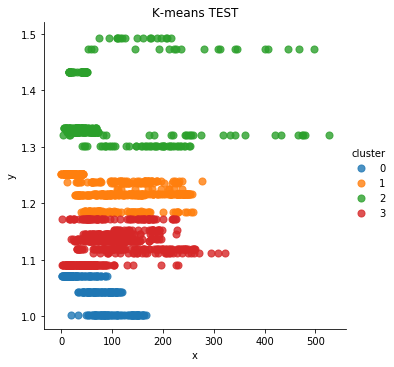

In [93]:
kmeans = KMeans(n_clusters=4).fit(points) #클러스터 수 조절
kmeans.cluster_centers_
block_PP['cluster']=kmeans.labels_
sb.lmplot('attractionPP_num', '2floor_ratio', data=block_PP, fit_reg=False, scatter_kws={"s":50},hue='cluster') #hue='cluster' 주석처리
plt.title("K-means TEST")
plt.xlabel('x')
plt.ylabel('y')